# Crops Production data from all over the world

The following dataset is collected from http://www.fao.org/faostat/en/#data/QC 

The data explains the following terms
1. Area: Country
2. Item: specific crop
3. Unit: quantity
 1. Area harvested (ha)
 2. Production (tonnes)
 3. Yield (hg/ha)
4. year: from 1961-2018

# Needed outcomes of Analysis

 1. Handling the missing data
 2. suggesting a perfect fit model
 3. Forecasting the Production for future needs

#Importing necessary libraries

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#listing out the varioud files in the directory
import os
for entry in os.scandir('.'):
    if entry.is_file():
        print(entry.name)

data.csv
FAO.ipynb
README.md


In [3]:
#importing the data
data = pd.read_csv('data.csv')

In [37]:
#informartion about data, data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51154 entries, 0 to 51153
Data columns (total 62 columns):
Area       51154 non-null object
Item       51154 non-null object
Element    51154 non-null object
Unit       51154 non-null object
1961       34520 non-null float64
1962       34550 non-null float64
1963       34548 non-null float64
1964       34575 non-null float64
1965       34566 non-null float64
1966       34720 non-null float64
1967       34750 non-null float64
1968       34837 non-null float64
1969       34869 non-null float64
1970       34980 non-null float64
1971       35057 non-null float64
1972       35101 non-null float64
1973       35113 non-null float64
1974       35178 non-null float64
1975       35346 non-null float64
1976       35428 non-null float64
1977       35622 non-null float64
1978       35671 non-null float64
1979       35839 non-null float64
1980       36143 non-null float64
1981       36257 non-null float64
1982       36378 non-null float64
1983       

In [5]:
#first 5 rows of the data
data.head()

Area                              Item         Element    Unit  \
0  Afghanistan               Almonds, with shell  Area harvested      ha   
1  Afghanistan               Almonds, with shell           Yield   hg/ha   
2  Afghanistan               Almonds, with shell      Production  tonnes   
3  Afghanistan  Anise, badian, fennel, coriander  Area harvested      ha   
4  Afghanistan  Anise, badian, fennel, coriander           Yield   hg/ha   

   1961  1962  1963  1964  1965  1966  ...     2009     2010     2011  \
0   NaN   NaN   NaN   NaN   NaN   NaN  ...  11029.0  11210.0  13469.0   
1   NaN   NaN   NaN   NaN   NaN   NaN  ...  39154.0  49955.0  45000.0   
2   NaN   NaN   NaN   NaN   NaN   NaN  ...  43183.0  56000.0  60611.0   
3   NaN   NaN   NaN   NaN   NaN   NaN  ...  17748.0  17000.0  19500.0   
4   NaN   NaN   NaN   NaN   NaN   NaN  ...   6203.0   6000.0   6414.0   

      2012     2013     2014     2015     2016     2017     2018  
0  13490.0  14114.0  13703.0  14676.0  19481.0  19793.0  20053.0  
1  45960.0  29910.0  19996.0  16521.0  16859.0  13788.0  17161.0  
2  62000.0  42215.0  27400.0  24246.0  32843.0  27291.0  34413.0  
3  18500.0  18500.0  30000.0  25000.0  25638.0  27582.0  25785.0  
4   6757.0   6757.0   7167.0   7200.0   7037.0   6954.0   7036.0  

[5 rows x 62 columns]

In [6]:
#obtaining the number of null values for each column
null_values = data.isna().sum()
null_values

Area           0
Item           0
Element        0
Unit           0
1961       16634
1962       16604
1963       16606
1964       16579
1965       16588
1966       16434
1967       16404
1968       16317
1969       16285
1970       16174
1971       16097
1972       16053
1973       16041
1974       15976
1975       15808
1976       15726
1977       15532
1978       15483
1979       15315
1980       15011
1981       14897
1982       14776
1983       14692
1984       14592
1985       12832
1986       12633
           ...  
1989       12092
1990       10602
1991       10372
1992        6850
1993        6631
1994        6341
1995        6158
1996        6061
1997        5856
1998        5686
1999        5434
2000        5027
2001        4932
2002        4869
2003        4564
2004        4361
2005        4293
2006        4106
2007        4030
2008        3992
2009        3977
2010        3893
2011        3877
2012        3789
2013        3784
2014        3752
2015        5529
2016        55

In [7]:
#percentage of null values for each variable
percentage_null_vales = (null_values/data.shape[0])*100
print(percentage_null_vales)

Area        0.000000
Item        0.000000
Element     0.000000
Unit        0.000000
1961       32.517496
1962       32.458850
1963       32.462760
1964       32.409978
1965       32.427572
1966       32.126520
1967       32.067873
1968       31.897799
1969       31.835243
1970       31.618251
1971       31.467725
1972       31.381710
1973       31.358252
1974       31.231184
1975       30.902764
1976       30.742464
1977       30.363217
1978       30.267428
1979       29.939008
1980       29.344724
1981       29.121867
1982       28.885327
1983       28.721117
1984       28.525628
1985       25.085037
1986       24.696016
             ...    
1989       23.638425
1990       20.725652
1991       20.276029
1992       13.390937
1993       12.962818
1994       12.395903
1995       12.038159
1996       11.848536
1997       11.447785
1998       11.115455
1999       10.622825
2000        9.827188
2001        9.641475
2002        9.518317
2003        8.922078
2004        8.525238
2005        8

In [8]:
#checking for the minimum and maximum percentage of null values
print("maximum null values %: {}".format(max(percentage_null_vales)))
print("maximum null values %: {}".format(min(percentage_null_vales[4: 64])))

maximum null values %: 32.517496187981386
maximum null values %: 7.334714782812683


<BarContainer object of 62 artists>

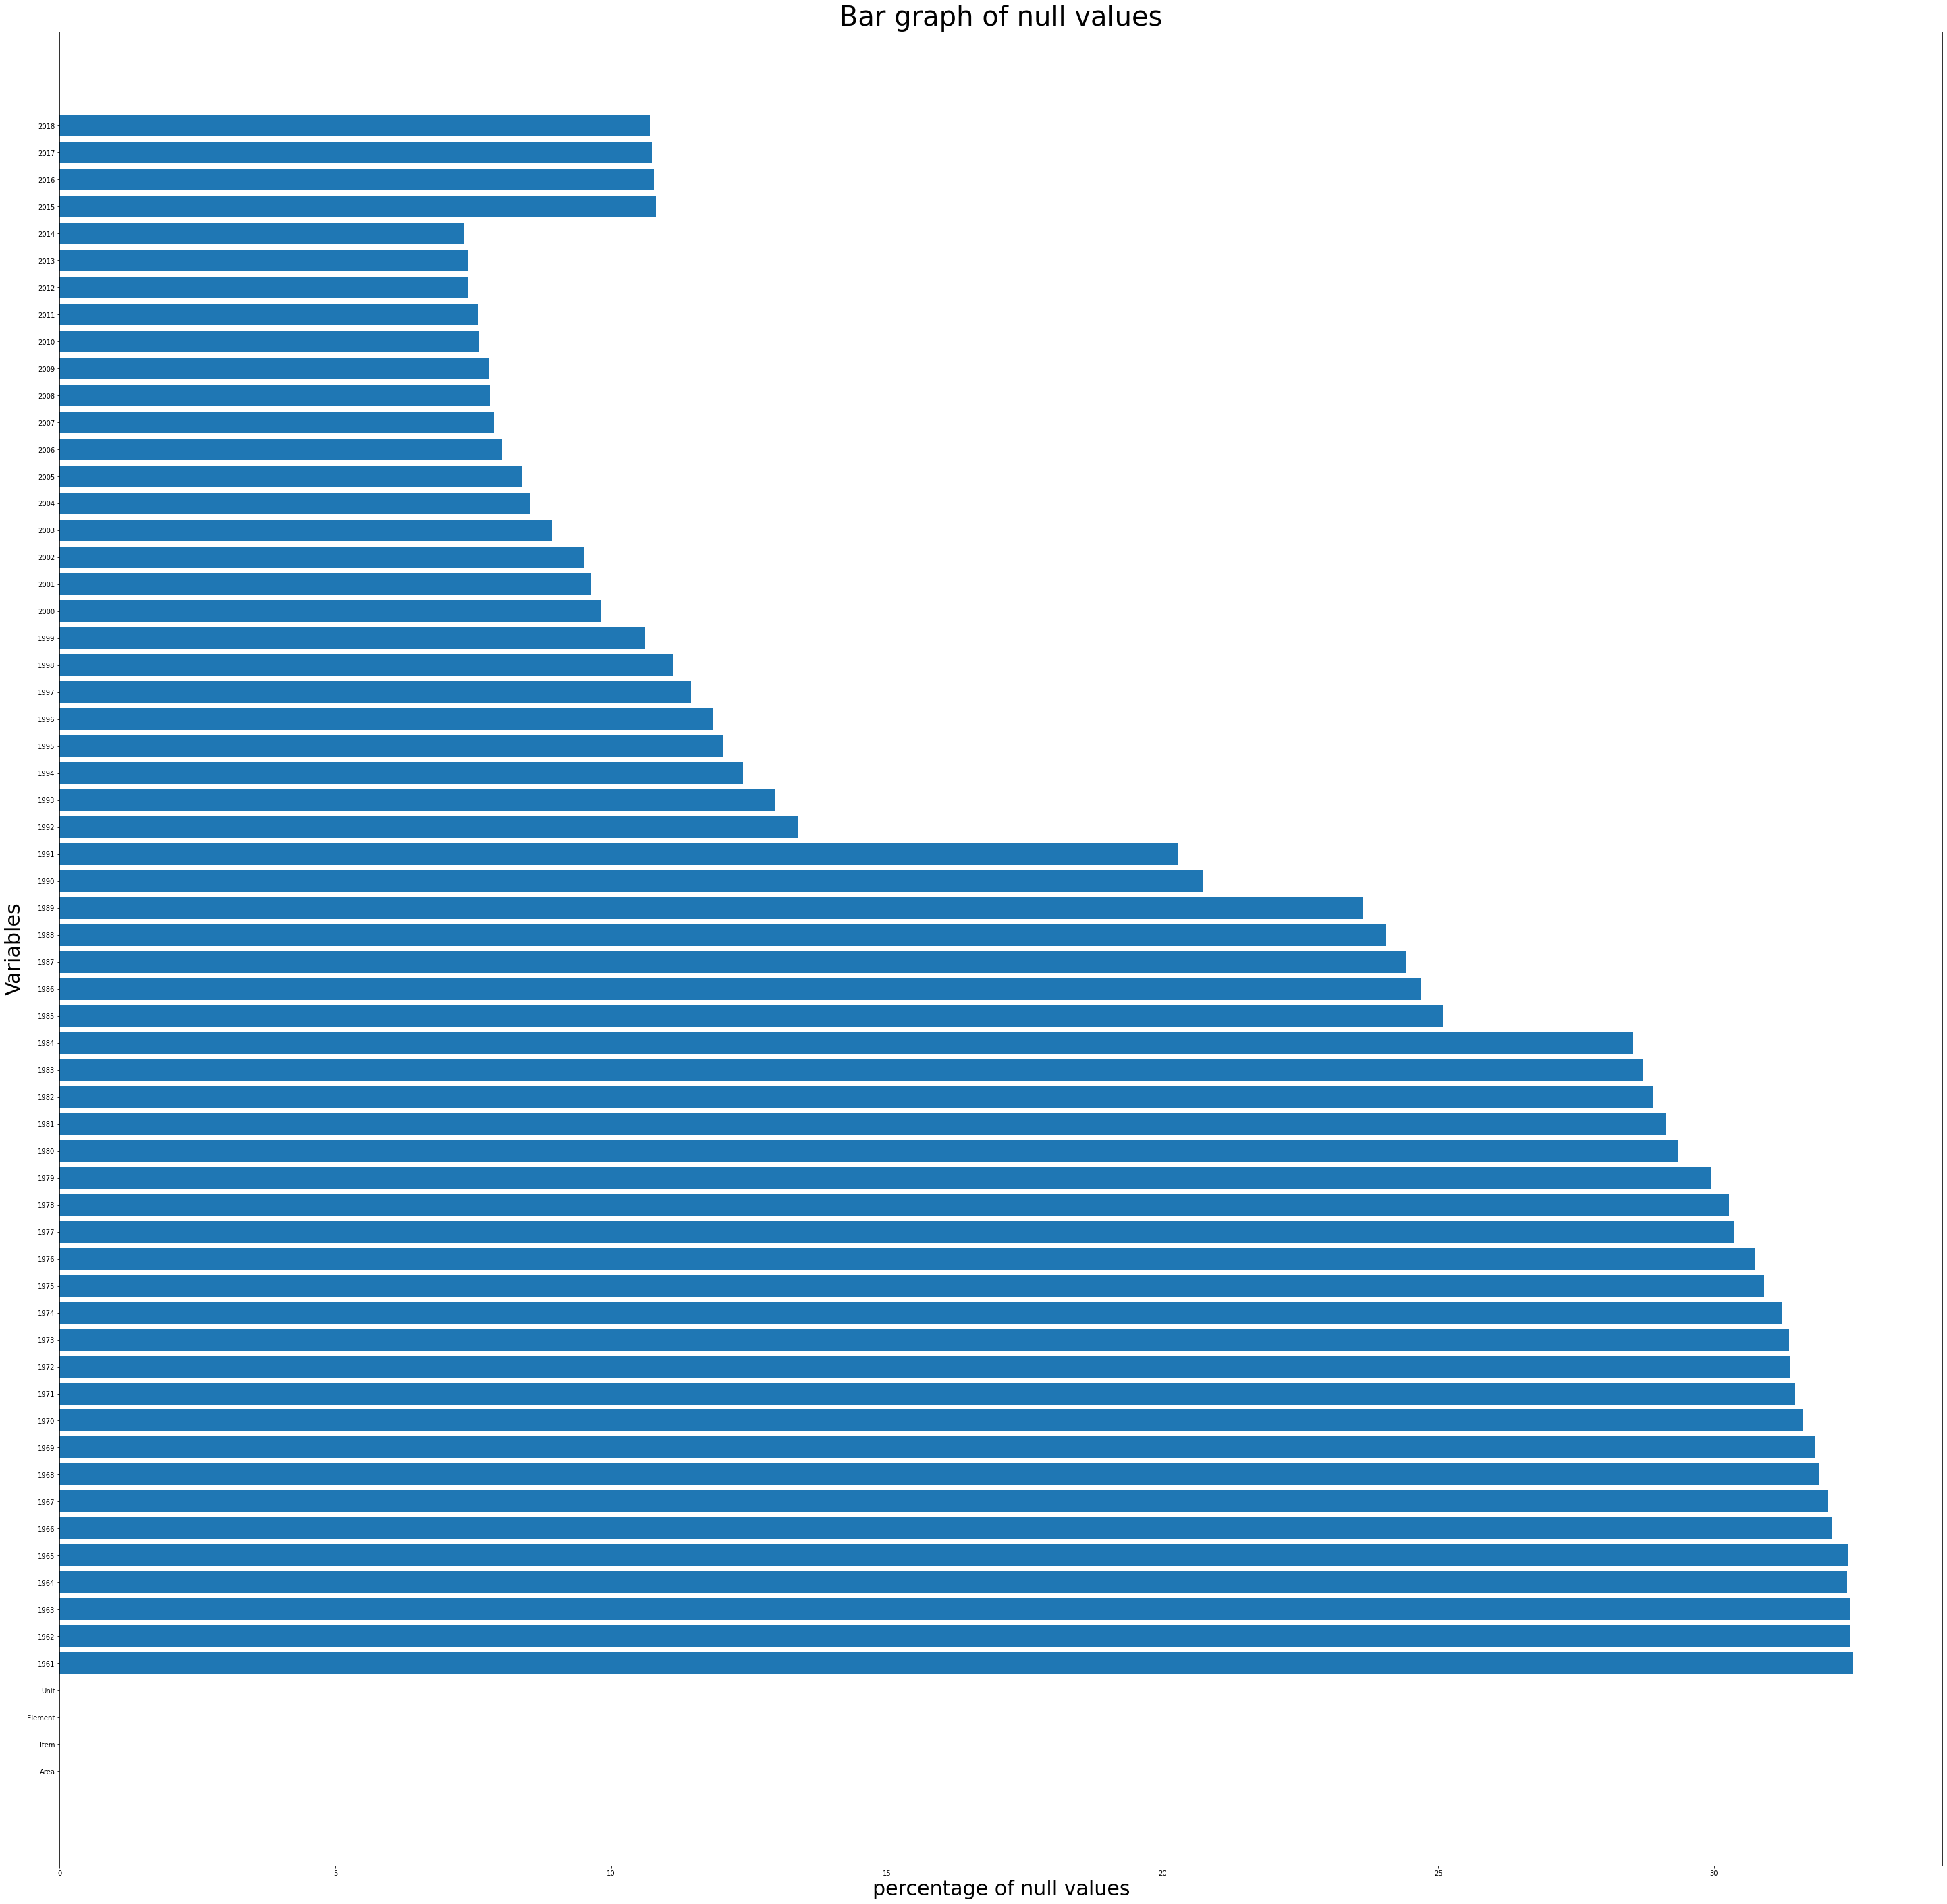

In [9]:
#exploratory graph for variavles vs percentage_null_vales
fig = plt.figure(1, figsize=(50,50))
plt.title("Bar graph of null values", fontsize=40)
plt.xlabel('percentage of null values', fontsize=30)
plt.ylabel('Variables', fontsize=30)
plt.barh(data.columns, percentage_null_vales)

In [10]:
#Unique crops grwon across the world
data['Item'].unique()

array(['Almonds, with shell', 'Anise, badian, fennel, coriander',
       'Apples', 'Apricots', 'Barley', 'Berries nes', 'Cotton lint',
       'Cottonseed', 'Figs', 'Fruit, citrus nes', 'Fruit, fresh nes',
       'Fruit, stone nes', 'Grapes', 'Linseed', 'Maize',
       'Melons, other (inc.cantaloupes)', 'Millet', 'Nuts nes', 'Olives',
       'Onions, dry', 'Oranges', 'Peaches and nectarines', 'Pears',
       'Pistachios', 'Plums and sloes', 'Potatoes', 'Pulses nes',
       'Rice, paddy', 'Seed cotton', 'Sesame seed', 'Spices nes',
       'Sugar beet', 'Sugar cane', 'Sunflower seed',
       'Vegetables, fresh nes', 'Walnuts, with shell', 'Watermelons',
       'Wheat', 'Cereals (Rice Milled Eqv)', 'Cereals, Total',
       'Citrus Fruit, Total', 'Coarse Grain, Total',
       'Fibre Crops Primary', 'Fruit Primary', 'Oilcrops',
       'Oilcrops, Cake Equivalent', 'Oilcrops, Oil Equivalent',
       'Pulses, Total', 'Roots and Tubers, Total', 'Treenuts, Total',
       'Vegetables Primary', 'Be

In [133]:
#filtreing the data with major crops like Rice-paddy, Wheat, Soybeans, Sugarcane, Maize. 
data_filter=data.loc[data['Item'].isin(['Rice, paddy', 'Wheat', 'Soybeans', 'Sugarcane', 'Maize'])]
null = data_filter.isnull().sum()
null_per = (null/data_filter.shape[0])*100
null_per

Area        0.000000
Item        0.000000
Element     0.000000
Unit        0.000000
1961       24.363992
1962       24.412916
1963       24.412916
1964       24.510763
1965       24.510763
1966       24.168297
1967       23.923679
1968       23.679061
1969       23.385519
1970       22.749511
1971       22.455969
1972       22.015656
1973       21.428571
1974       21.135029
1975       20.694716
1976       20.254403
1977       20.107632
1978       20.401174
1979       20.401174
1980       20.156556
1981       20.401174
1982       20.254403
1983       19.960861
1984       19.960861
1985       19.569472
1986       18.982387
             ...    
1989       18.150685
1990       16.878669
1991       17.025440
1992        8.806262
1993        8.365949
1994        8.365949
1995        8.072407
1996        8.219178
1997        8.268102
1998        8.414873
1999        8.414873
2000        7.974560
2001        7.827789
2002        7.925636
2003        7.681018
2004        7.485323
2005        7

As missing data before 1992 is more than 10%, lest avoid as. Because the simple impution for handling missing data best works for >10% missing data

In [135]:
data_filter = data_filter.drop(['1961', '1962', '1963', '1964','1965', '1966', '1967', '1968', '1969', '1970',
                                '1971', '1972', '1973','1974', '1975', '1976', '1977', '1978', '1979', '1980', 
                                '1981', '1982','1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
                                '1991',], axis=1)
data_filter.head()

Area         Item         Element    Unit      1992      1993  \
38  Afghanistan        Maize  Area harvested      ha  200000.0  280000.0   
39  Afghanistan        Maize           Yield   hg/ha   15000.0   16786.0   
40  Afghanistan        Maize      Production  tonnes  300000.0  470000.0   
77  Afghanistan  Rice, paddy  Area harvested      ha  175000.0  175000.0   
78  Afghanistan  Rice, paddy           Yield   hg/ha   17143.0   17143.0   

        1994      1995      1996      1997  ...      2009      2010      2011  \
38  300000.0  320000.0  220000.0  200000.0  ...  140000.0  183000.0  183000.0   
39   16667.0   16563.0   16364.0   15000.0  ...   21429.0   16448.0   16400.0   
40  500000.0  530000.0  360000.0  300000.0  ...  300000.0  301000.0  300120.0   
77  180000.0  170000.0  175000.0  180000.0  ...  200000.0  208000.0  210000.0   
78   19000.0   22941.0   19429.0   22222.0  ...   32250.0   32308.0   32000.0   

        2012      2013      2014      2015      2016      2017      2018  
38  141000.0  142000.0  127000.0  147273.0  151900.0  134225.0   72433.0  
39   21986.0   21972.0   24882.0   21457.0   20517.0   12957.0   14727.0  
40  310000.0  312000.0  316000.0  316000.0  311646.0  173912.0  106670.0  
77  205000.0  205000.0  220000.0  164000.0  119000.0  109452.0  117539.0  
78   24390.0   24980.0   24409.0   25000.0   29963.0   30919.0   29963.0  

[5 rows x 31 columns]

In [203]:
#data filtering according to production, yield and area harvested
data_production = data_filter.loc[data_filter['Element'].isin(['Production'])]
data_yield = data_filter.loc[data_filter['Element'].isin(['Yield'])]
data_area_harvested = data_filter.loc[data_filter['Element'].isin(['Area harvested'])]

#removing unwanted row from above filtered data i.e 'Element', 'Unit'
data_production = data_production.drop(['Unit', 'Element'], axis=1)
data_yield = data_yield.drop(['Unit', 'Element'], axis=1)
data_area_harvested = data_area_harvested.drop(['Unit', 'Element'], axis=1)

#further filtering the data based on crops = 'Rice, paddy', 'Wheat', 'Soybeans', 'Sugarcane', 'Maize', and droping the item row
data_production_rice = data_production.loc[data_production['Item'].isin(['Rice, paddy'])].drop(['Item'], axis=1)
data_production_wheat = data_production.loc[data_production['Item'].isin(['Wheat'])].drop(['Item'], axis=1)
data_production_soyabean = data_production.loc[data_production['Item'].isin(['Soyabeans'])].drop(['Item'], axis=1)
data_production_sugarcane = data_production.loc[data_production['Item'].isin(['Sugarcane'])].drop(['Item'], axis=1)
data_production_maize = data_production.loc[data_production['Item'].isin(['Maize'])].drop(['Item'], axis=1)

data_yield_rice = data_yield.loc[data_yield['Item'].isin(['Rice, paddy'])].drop(['Item'], axis=1)
data_yield_wheat = data_yield.loc[data_yield['Item'].isin(['Wheat'])].drop(['Item'], axis=1)
data_yield_soyabean = data_yield.loc[data_yield['Item'].isin(['Soyabeans'])].drop(['Item'], axis=1)
data_yield_sugarcane = data_yield.loc[data_yield['Item'].isin(['Sugarcane'])].drop(['Item'], axis=1)
data_yield_maize = data_yield.loc[data_yield['Item'].isin(['Maize'])].drop(['Item'], axis=1)

data_area_harvested_rice = data_area_harvested.loc[data_area_harvested['Item'].isin(['Rice, paddy'])].drop(['Item'], axis=1)
data_area_harvested_wheat = data_area_harvested.loc[data_area_harvested['Item'].isin(['Wheat'])].drop(['Item'], axis=1)
data_area_harvested_soyabean = data_area_harvested.loc[data_area_harvested['Item'].isin(['Soyabeans'])].drop(['Item'], axis=1)
data_area_harvested_sugarcane = data_area_harvested.loc[data_area_harvested['Item'].isin(['Sugarcane'])].drop(['Item'], axis=1)
data_area_harvested_maize = data_area_harvested.loc[data_area_harvested['Item'].isin(['Maize'])].drop(['Item'], axis=1)

data_yield_rice.head()

Area     1992     1993     1994     1995     1996     1997  \
78    Afghanistan  17143.0  17143.0  19000.0  22941.0  19429.0  22222.0   
283       Albania  40000.0  41786.0      NaN      NaN      NaN      NaN   
519       Algeria  24739.0  23121.0  21387.0  19615.0  17881.0  15000.0   
737        Angola   9142.0   8000.0   8750.0  14615.0  17500.0  20000.0   
1080    Argentina  52075.0  43559.0  42989.0  50306.0  51031.0  53703.0   

         1998     1999     2000  ...     2009     2010     2011     2012  \
78    25000.0  20000.0  20000.0  ...  32250.0  32308.0  32000.0  24390.0   
283       NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   
519   15032.0  13983.0  13101.0  ...  14615.0  15320.0  16089.0  16667.0   
737   20000.0  14235.0  13454.0  ...   6028.0   7403.0   8914.0   7703.0   
1080  47762.0  57337.0  47798.0  ...  68842.0  57646.0  67901.0  66617.0   

         2013     2014     2015     2016     2017     2018  
78    24980.0  24409.0  25000.0  29963.0  30919.0  29963.0  
283       NaN      NaN      NaN      NaN      NaN      NaN  
519   17778.0  17778.0  18281.0  19483.0  20179.0  20871.0  
737   12744.0  14064.0  15068.0   8062.0   9572.0   7175.0  
1080  67187.0  65042.0  66989.0  67632.0  65083.0  69030.0  

[5 rows x 28 columns]

In [204]:
data_yield_maize.reset_index(drop=True, inplace=True)
df = data_yield_maize.T
df.head()

0        1        2       3                    4          5    \
Area  Afghanistan  Albania  Algeria  Angola  Antigua and Barbuda  Argentina   
1992        15000    24876    22828    3778                17136      45237   
1993        16786    24185    12500    2627                16901      43552   
1994        16667    25848     4512    2463                16684      42371   
1995        16563    31300    16115    3517                16071      45223   

          6          7        8           9    ...      203  \
Area  Armenia  Australia  Austria  Azerbaijan  ...  Oceania   
1992    32344      51721    64800       18740  ...    59938   
1993    32261      44261    89710       13918  ...    52526   
1994    32667      46620    79160       14619  ...    57083   
1995    18261      48263    85000       11810  ...    58479   

                            204        205         206             207  \
Area  Australia and New Zealand  Melanesia  Micronesia  European Union   
1992                      61857      17900       12974           47710   
1993                      54549      16376       13011           50881   
1994                      59352      19691       13178           52064   
1995                      60423      22128       13171           54994   

                            208                               209  \
Area  Least Developed Countries  Land Locked Developing Countries   
1992                       9580                             12136   
1993                      12155                             18389   
1994                      10393                             13914   
1995                      12465                             14354   

                                 210                                211  \
Area  Small Island Developing States  Low Income Food Deficit Countries   
1992                            9414                              14201   
1993                            9810                              15629   
1994                            9900                              14233   
1995                           10298                              14248   

                                          212  
Area  Net Food Importing Developing Countries  
1992                                    13499  
1993                                    15145  
1994                                    14470  
1995                                    15824  

[5 rows x 213 columns]

In [205]:
df.columns = df.iloc[0]
df = df[1:]
df.head()

Area Afghanistan Albania Algeria Angola Antigua and Barbuda Argentina Armenia  \
1992       15000   24876   22828   3778               17136     45237   32344   
1993       16786   24185   12500   2627               16901     43552   32261   
1994       16667   25848    4512   2463               16684     42371   32667   
1995       16563   31300   16115   3517               16071     45223   18261   
1996       16364   32604   17154   6993               16390     40397   22239   

Area Australia Austria Azerbaijan  ... Oceania Australia and New Zealand  \
1992     51721   64800      18740  ...   59938                     61857   
1993     44261   89710      13918  ...   52526                     54549   
1994     46620   79160      14619  ...   57083                     59352   
1995     48263   85000      11810  ...   58479                     60423   
1996     57689   86200      17369  ...   69057                     71394   

Area Melanesia Micronesia European Union Least Developed Countries  \
1992     17900      12974          47710                      9580   
1993     16376      13011          50881                     12155   
1994     19691      13178          52064                     10393   
1995     22128      13171          54994                     12465   
1996     25455      13379          57720                     13441   

Area Land Locked Developing Countries Small Island Developing States  \
1992                            12136                           9414   
1993                            18389                           9810   
1994                            13914                           9900   
1995                            14354                          10298   
1996                            16549                          10810   

Area Low Income Food Deficit Countries Net Food Importing Developing Countries  
1992                             14201                                   13499  
1993                             15629                                   15145  
1994                             14233                                   14470  
1995                             14248                                   15824  
1996                             15047                                   16525  

[5 rows x 213 columns]

In [206]:
df = df.reset_index().set_index('index', drop=False)
df = df.reset_index()


ValueError: cannot insert index, already exists

In [152]:
data_yield_maize = data_yield_maize.T
data_yield_maize


39       229      470     717                  847        1018   \
Area  Afghanistan  Albania  Algeria  Angola  Antigua and Barbuda  Argentina   
1992        15000    24876    22828    3778                17136      45237   
1993        16786    24185    12500    2627                16901      43552   
1994        16667    25848     4512    2463                16684      42371   
1995        16563    31300    16115    3517                16071      45223   
1996        16364    32604    17154    6993                16390      40397   
1997        15000    31862    21417    5959                16342      45557   
1998        16500    33416    17222    7396                16318      60780   
1999        15000    37455    22375    6361                16317      53702   
2000        11979    38811    36186    5745                16000      54329   
2001        20000    38135    27175    5754                16149      54553   
2002        29800    39460    33480    6706                15625      60791   
2003         8400    42805    28853    7559                15714      64767   
2004        16000    46197    31729    5404                15789      63931   
2005        12069    45442    33864    6736                15974      73587   
2006        26204    50111    65668    4687                16250      59030   
2007        26277    46732    85625    5091                16014      76655   
2008        26277    50000    44714    7946                16190      64525   
2009        21429    55693    30914    6614                15902      55760   
2010        16448    66790    25827    7200                15859      78040   
2011        16400    59869    23374    7376                15974      63503   
2012        21986    67290    25583    7770                15953      57346   
2013        21972    69533    33649    9467                15931      66037   
2014        24882    69091    26165   10386                15804      68409   
2015        21457    69597    39242   11234                15811      73090   
2016        20517    64877    45122    8717                15873      74427   
2017        12957    65632    13007    8467                15856      75759   
2018        14727    72273    18407    8555                15839      60883   

        1248       1468     1738        1964   ...    47492  \
Area  Armenia  Australia  Austria  Azerbaijan  ...  Oceania   
1992    32344      51721    64800       18740  ...    59938   
1993    32261      44261    89710       13918  ...    52526   
1994    32667      46620    79160       14619  ...    57083   
1995    18261      48263    85000       11810  ...    58479   
1996    22239      57689    86200       17369  ...    69057   
1997    45548      59403    97800       24340  ...    67032   
1998    26082      47544    96100       29541  ...    58565   
1999    40303      51212    96000       35343  ...    61224   
2000    23178      49360    98600       32484  ...    57511   
2001    37913      46471    90869       37823  ...    56032   
2002    37380      54929    99815       43463  ...    57886   
2003    46059      62570    86950       44451  ...    72556   
2004    61791      56326    96544       46071  ...    67865   
2005    44692      57983   106570       47703  ...    66748   
2006    33271      53856    96370       45777  ...    64577   
2007    53262      49103   103128       46175  ...    62345   
2008    53424      56912   113173       47784  ...    66497   
2009    57763      58171   108293       47990  ...    69180   
2010    46724      55593    97247       45551  ...    65335   
2011    54257      57390   112996       45460  ...    68457   
2012    62215      64654   107025       51029  ...    72264   
2013    67114      64441    81173       53903  ...    70901   
2014    70829      74554   107915       54180  ...    81300   
2015    68821      83001    86787       59700  ...    87813   
2016    63909      75080   111629       62485  ...    82700   
2017    49002      

In [154]:
data_yield_maize.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Area to 2018
Columns: 213 entries, 39 to 50887
dtypes: object(213)
memory usage: 48.1+ KB


In [121]:
null = data_production.isnull().sum()
null_per = (null/data_production.shape[0])*100
null_per

Area     0.000000
Item     0.000000
1992     6.666667
1993     6.666667
1994     6.666667
1995     6.666667
1996    13.333333
1997    13.333333
1998    13.333333
1999    13.333333
2000     6.666667
2001     6.666667
2002     6.666667
2003     6.666667
2004     6.666667
2005     6.666667
2006     6.666667
2007     6.666667
2008     6.666667
2009     6.666667
2010     6.666667
2011     6.666667
2012     6.666667
2013     6.666667
2014     0.000000
2015     0.000000
2016     0.000000
2017     0.000000
2018     0.000000
dtype: float64

In [154]:
#obtaining the number of null values for each column
null_values_filter = data_filter.isna().sum()
#percentage of null values for each variable
percentage_null_vales_filter = (null_values_filter/data_filter.shape[0])*100
print(percentage_null_vales_filter)

Area        0.000000
Item        0.000000
Element     0.000000
Unit        0.000000
1961       24.363992
1962       24.412916
1963       24.412916
1964       24.510763
1965       24.510763
1966       24.168297
1967       23.923679
1968       23.679061
1969       23.385519
1970       22.749511
1971       22.455969
1972       22.015656
1973       21.428571
1974       21.135029
1975       20.694716
1976       20.254403
1977       20.107632
1978       20.401174
1979       20.401174
1980       20.156556
1981       20.401174
1982       20.254403
1983       19.960861
1984       19.960861
1985       19.569472
1986       18.982387
             ...    
1989       18.150685
1990       16.878669
1991       17.025440
1992        8.806262
1993        8.365949
1994        8.365949
1995        8.072407
1996        8.219178
1997        8.268102
1998        8.414873
1999        8.414873
2000        7.974560
2001        7.827789
2002        7.925636
2003        7.681018
2004        7.485323
2005        7

In [155]:
#dropping 'Unit' column
data_filter = data_filter.drop(['Unit'], axis=1)
data_filter.head()

Area         Item         Element      1961      1962      1963  \
38  Afghanistan        Maize  Area harvested  500000.0  500000.0  500000.0   
39  Afghanistan        Maize           Yield   14000.0   14000.0   14260.0   
40  Afghanistan        Maize      Production  700000.0  700000.0  713000.0   
77  Afghanistan  Rice, paddy  Area harvested  210000.0  210000.0  210000.0   
78  Afghanistan  Rice, paddy           Yield   15190.0   15190.0   15190.0   

        1964      1965      1966      1967  ...      2009      2010      2011  \
38  505000.0  500000.0  500000.0  543000.0  ...  140000.0  183000.0  183000.0   
39   14257.0   14400.0   14400.0   14144.0  ...   21429.0   16448.0   16400.0   
40  720000.0  720000.0  720000.0  768000.0  ...  300000.0  301000.0  300120.0   
77  220000.0  220000.0  222000.0  206000.0  ...  200000.0  208000.0  210000.0   
78   17273.0   17273.0   15180.0   19223.0  ...   32250.0   32308.0   32000.0   

        2012      2013      2014      2015      2016      2017      2018  
38  141000.0  142000.0  127000.0  147273.0  151900.0  134225.0   72433.0  
39   21986.0   21972.0   24882.0   21457.0   20517.0   12957.0   14727.0  
40  310000.0  312000.0  316000.0  316000.0  311646.0  173912.0  106670.0  
77  205000.0  205000.0  220000.0  164000.0  119000.0  109452.0  117539.0  
78   24390.0   24980.0   24409.0   25000.0   29963.0   30919.0   29963.0  

[5 rows x 61 columns]

In [79]:
data_year = data_filter[data_filter.columns[4:61]]
data_year.isnull().sum()

1961    498
1962    499
1963    499
1964    501
1965    501
1966    494
1967    489
1968    484
1969    478
1970    465
1971    459
1972    450
1973    438
1974    432
1975    423
1976    414
1977    411
1978    417
1979    417
1980    412
1981    417
1982    414
1983    408
1984    408
1985    400
1986    388
1987    387
1988    376
1989    371
1990    345
1991    348
1992    180
1993    171
1994    171
1995    165
1996    168
1997    169
1998    172
1999    172
2000    163
2001    160
2002    162
2003    157
2004    153
2005    151
2006    144
2007    143
2008    143
2009    147
2010    144
2011    141
2012    138
2013    135
2014    136
2015    136
2016    131
2017    131
dtype: int64

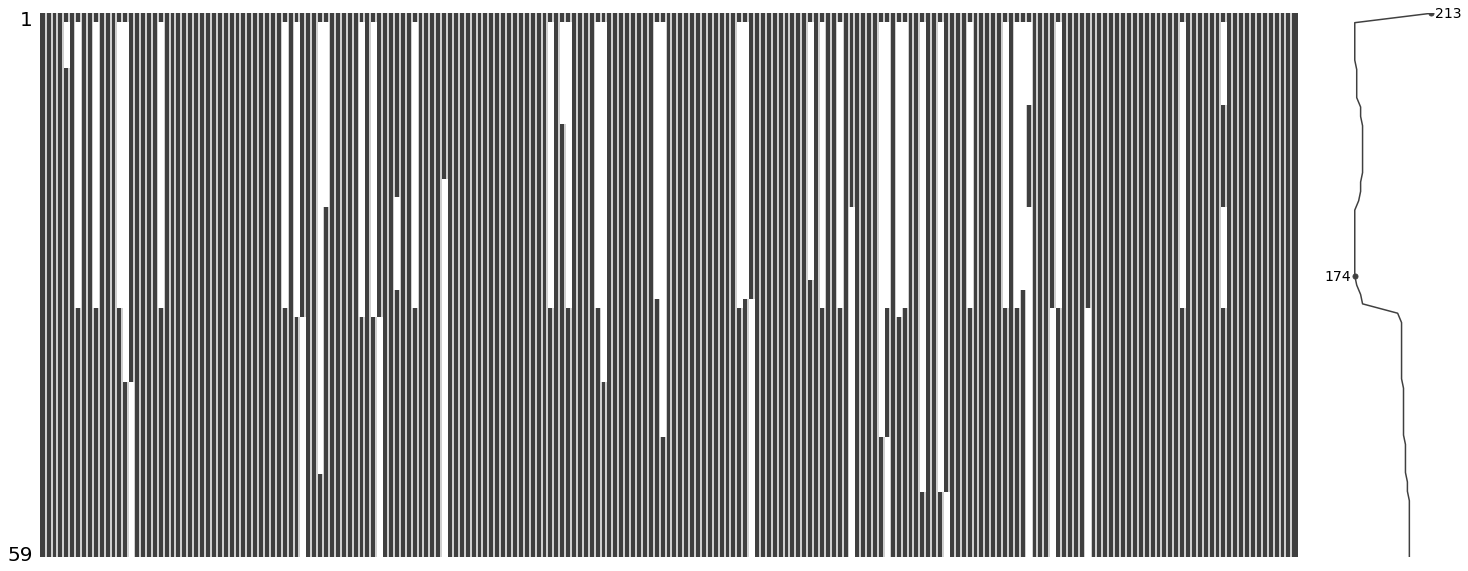

In [78]:
import missingno as msno
msno.matrix(data_production_maize.T)

In [80]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = np.nan, strategy='median')
data_f = imputer.fit_transform(data_year)